In [1]:
import sys
from pathlib import Path
import os

%load_ext autoreload
%autoreload 2

# add project root (credit-risk-analysis) to sys.path
ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]
sys.path.append(str(ROOT))

from src.data_prep import (
    
    load_loan_default,
    clean_loan_default,
    load_credit_risk,
    clean_credit_risk,
)

from src.features import (
    engineer_features_credit_risk,
    engineer_features_loan_default,
)
from src.eda import (
    basic_summary, 
    plot_default_rate, 
    kde_by_target
) 


In [2]:
# load and prep

loan_path = "/Users/erincheng/Desktop/credit-risk-analysis/data/raw/Loan_default.csv"
credit_path = "/Users/erincheng/Desktop/credit-risk-analysis/data/raw/credit_risk_dataset.csv"


df_loans = load_loan_default(loan_path)

print("Before clean:", df_loans.columns.tolist())

df_loans_clean = clean_loan_default(df_loans)
print("Cleaned:", df_loans_clean.columns.tolist())


df_loans_fe = engineer_features_loan_default(df_loans_clean)

df_credit = load_credit_risk(credit_path)

df_credit_clean = clean_credit_risk(df_credit)
df_credit_fe = engineer_features_credit_risk(df_credit_clean)

Before clean: ['loan_i_d', 'age', 'income', 'loan_amount', 'credit_score', 'months_employed', 'num_credit_lines', 'interest_rate', 'loan_term', 'd_t_i_ratio', 'education', 'employment_type', 'marital_status', 'has_mortgage', 'has_dependents', 'loan_purpose', 'has_co_signer', 'default']
Inside clean_loan_default, initial cols: ['loan_i_d', 'age', 'income', 'loan_amount', 'credit_score', 'months_employed', 'num_credit_lines', 'interest_rate', 'loan_term', 'd_t_i_ratio', 'education', 'employment_type', 'marital_status', 'has_mortgage', 'has_dependents', 'loan_purpose', 'has_co_signer', 'default']
After rename: ['loan_id', 'age', 'income', 'loan_amount', 'credit_score', 'months_employed', 'num_credit_lines', 'interest_rate', 'loan_term', 'dti_ratio', 'education', 'employment_type', 'marital_status', 'has_mortgage', 'has_dependents', 'loan_purpose', 'has_co_signer', 'default']
Cleaned: ['loan_id', 'age', 'income', 'loan_amount', 'credit_score', 'months_employed', 'num_credit_lines', 'intere

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   loan_id              255347 non-null  object  
 1   age                  255347 non-null  int64   
 2   income               255347 non-null  int64   
 3   loan_amount          255347 non-null  int64   
 4   credit_score         255347 non-null  int64   
 5   months_employed      255347 non-null  int64   
 6   num_credit_lines     255347 non-null  int64   
 7   interest_rate        255347 non-null  float64 
 8   loan_term            255347 non-null  int64   
 9   dti_ratio            255347 non-null  float64 
 10  education            255347 non-null  object  
 11  employment_type      255347 non-null  object  
 12  marital_status       255347 non-null  object  
 13  has_mortgage         255347 non-null  object  
 14  has_dependents       255347 non-null  object  
 15  

/Users/erincheng/Desktop/credit-risk-analysis/src/eda.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target]


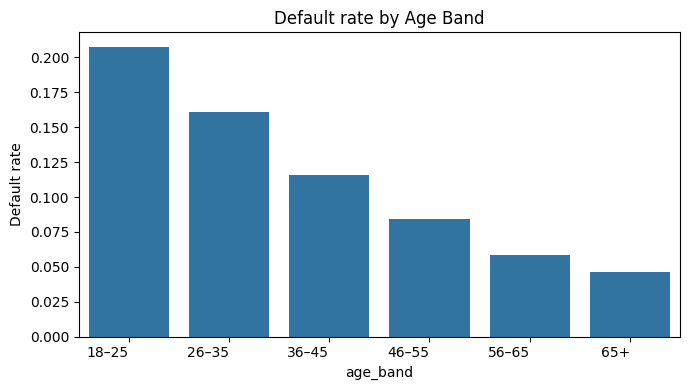

/Users/erincheng/Desktop/credit-risk-analysis/src/eda.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target]


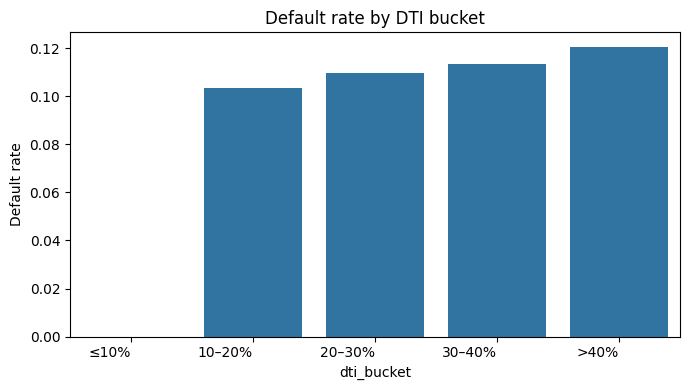

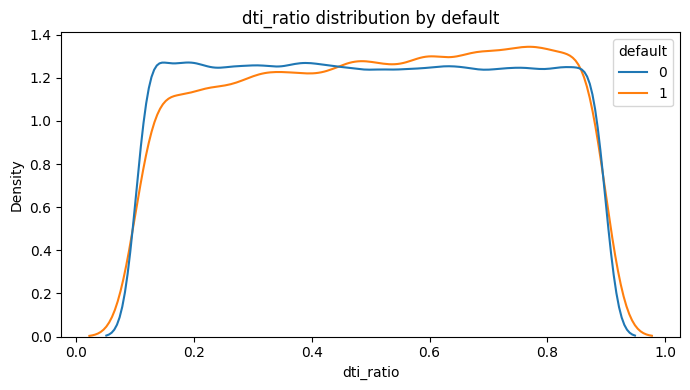

In [3]:
# EDA: loan default

basic_summary(df_loans_fe, target="default")
plot_default_rate(df_loans_fe, "age_band", "default", "Default rate by Age Band", rotation=0)
plot_default_rate(df_loans_fe, "dti_bucket", "default", "Default rate by DTI bucket", rotation=0)
kde_by_target(df_loans_fe, "dti_ratio", "default")

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32416 non-null  int64   
 1   person_income               32416 non-null  int64   
 2   person_home_ownership       32416 non-null  object  
 3   person_emp_length           32416 non-null  float64 
 4   loan_intent                 32416 non-null  object  
 5   loan_grade                  32416 non-null  object  
 6   loan_amnt                   32416 non-null  int64   
 7   loan_int_rate               32416 non-null  float64 
 8   default_flag                32416 non-null  int64   
 9   loan_percent_income         32416 non-null  float64 
 10  cb_person_default_on_file   32416 non-null  object  
 11  cb_person_cred_hist_length  32416 non-null  int64   
 12  age_band                    32411 non-null  category
 13  income_band          

/Users/erincheng/Desktop/credit-risk-analysis/src/eda.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(col)[target]


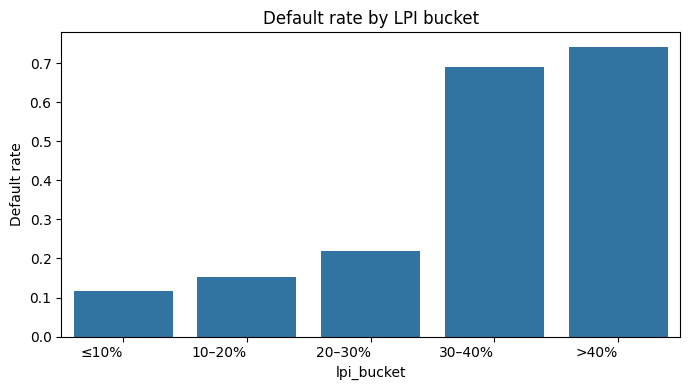

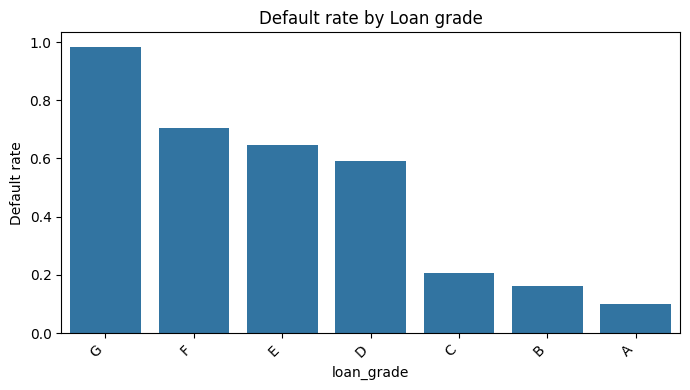

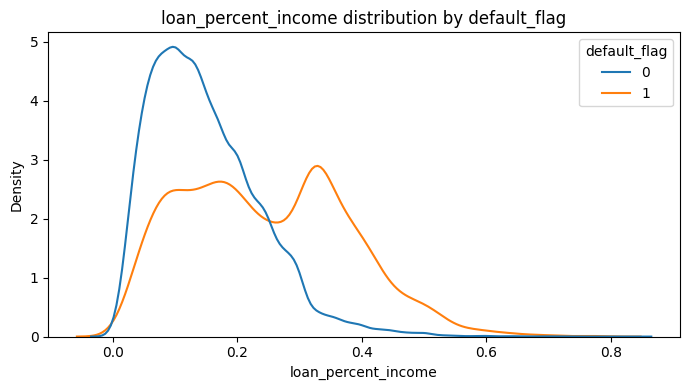

In [4]:
# EDA: credit risk

basic_summary(df_credit_fe, target="default_flag")
plot_default_rate(df_credit_fe,"lpi_bucket", "default_flag", "Default rate by LPI bucket", rotation=0)
plot_default_rate(df_credit_fe, "loan_grade", "default_flag", "Default rate by Loan grade")
kde_by_target(df_credit_fe, "loan_percent_income", "default_flag")

In [5]:
# save data

base = "/Users/erincheng/Desktop/credit-risk-analysis"

os.makedirs(f"{base}/data/interim", exist_ok=True)
os.makedirs(f"{base}/data/processed", exist_ok=True)

# Save cleaned versions
df_loans_clean.to_csv(f"{base}/data/interim/loan_default_clean.csv", index=False)
df_credit_clean.to_csv(f"{base}/data/interim/credit_risk_clean.csv", index=False)

# Save feature-engineered versions
df_loans_fe.to_csv(f"{base}/data/processed/loan_default_features.csv", index=False)
df_credit_fe.to_csv(f"{base}/data/processed/credit_risk_features.csv", index=False)
